### Activity 3 (Wednesday)
As a reminder the objective of this study is to predict the `total claim amount` of a customer and study/investigate the impact of the factors (input features) on the target variable(`total claim amount`). That means in your exploratory data analysis, you have to look for patterns in this data that show interesting relationships among the input features as well as with relation to the target feature.
- Get the numeric data into a dataframe called `numerical` and categorical columns in a dataframe called `categorical`.
(You can use "np.number" and "object" to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use the Seaborn library to construct distribution plots for the numerical variables
  - Use the Matplotlib library to construct histograms.
  - Do the distributions for different numerical variables look like a normal distribution? 
- For the numerical variables, check for correlation between the input features. Note: this does not include the target feature.
- Plot the Correlation Heatmap.
- (Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

Useful functions for the lab
- sns.pairplot()
- pd.hist()
- sns.displot()
- plt.hist()
- plt.bar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Colour Palette for the Notebook

sns.set_palette("PRGn")
palette_response = {"yes": "C10", "no": "C0"}

In [3]:
df_base = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [4]:
df_base.head()

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


In [5]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical. (You can use "np.number" and "object" to select the numerical data types and categorical data types respectively)

In [6]:
df_numerical = df_base.select_dtypes(np.number)

In [7]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_open_complaints      10689 non-null  int64
 6   number_of_policies             10689 non-null  int64
 7   total_claim_amount             10689 non-null  int64
dtypes: int64(8)
memory usage: 668.2 KB


In [8]:
df_categorical = df_base.select_dtypes(object)

In [9]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   effective_to_date  10689 non-null  object
 5   month              10689 non-null  object
 6   employment_status  10689 non-null  object
 7   gender             10689 non-null  object
 8   location_code      10689 non-null  object
 9   marital_status     10689 non-null  object
 10  policy_type        10689 non-null  object
 11  policy             10689 non-null  object
 12  renew_offer_type   10689 non-null  object
 13  sales_channel      10689 non-null  object
 14  vehicle_class      10689 non-null  object
 15  vehicle_size       10689 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB


array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'monthly_premium_auto'}>],
       [<Axes: title={'center': 'months_since_last_claim'}>,
        <Axes: title={'center': 'months_since_policy_inception'}>,
        <Axes: title={'center': 'number_of_open_complaints'}>],
       [<Axes: title={'center': 'number_of_policies'}>,
        <Axes: title={'center': 'total_claim_amount'}>, <Axes: >]],
      dtype=object)

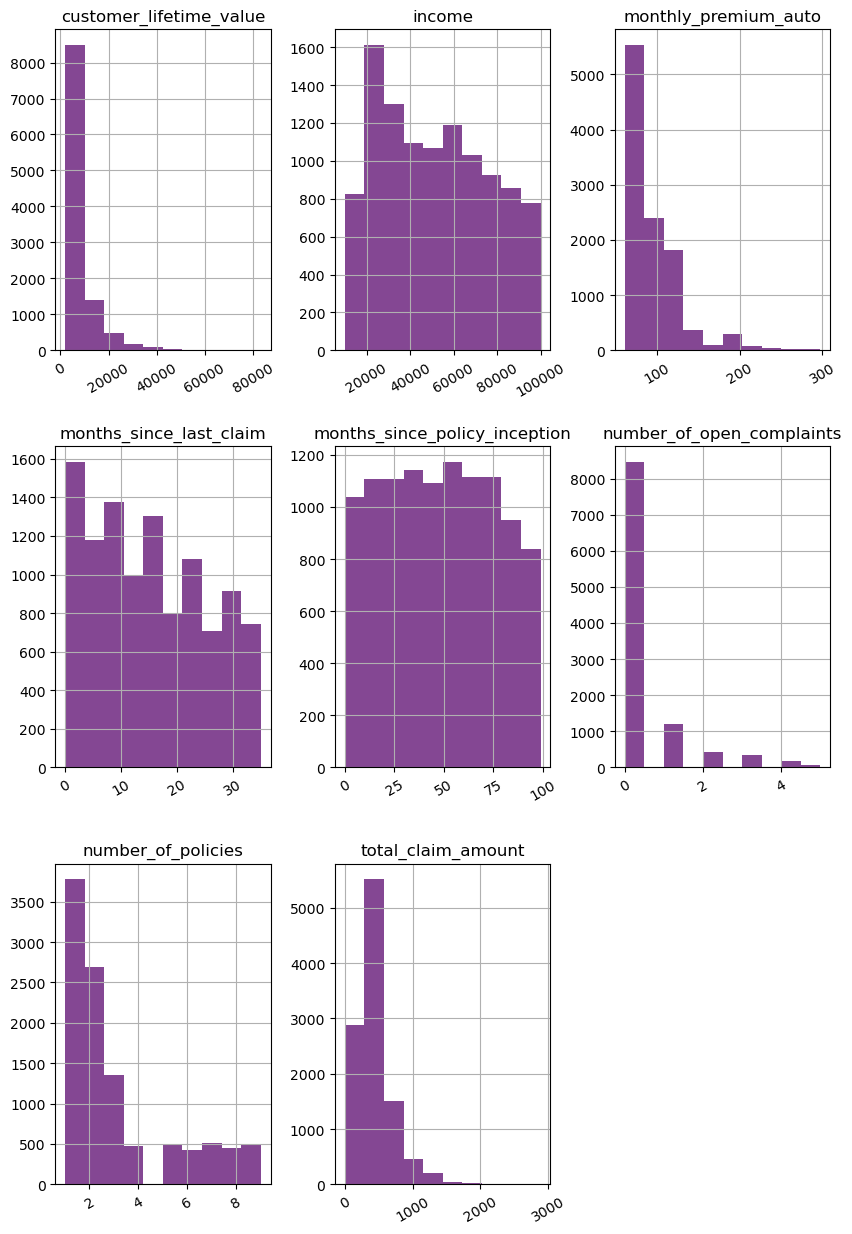

In [10]:
df_numerical.hist(figsize=(10,15), xrot=30)
# sns.displot also possible

<Axes: >

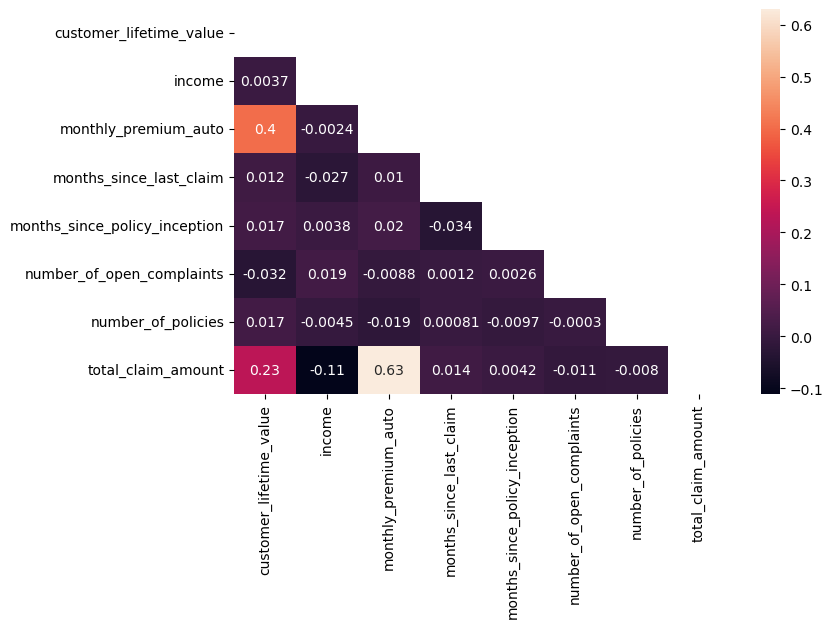

In [11]:
corr = df_numerical.corr()
matrix = np.triu(corr)
mask = matrix

fig = plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, mask=matrix)
# mask recommend to hide upper triangle (doubled)

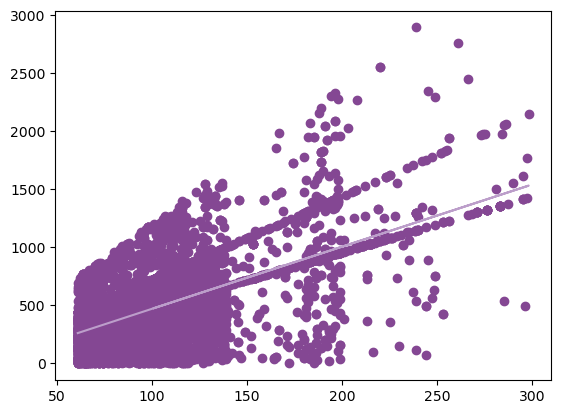

In [12]:
# scatterplot to check noticeable correlation
# linear regression

x = np.array(df_numerical['monthly_premium_auto'])
y = np.array(df_numerical['total_claim_amount'])

plt.plot(x,y,'o')
m,b = np.polyfit(x,y,1)
plt.plot(x,m*x+b)

In [13]:
# in classification is our target variable is discrete
# in regeression is our target variavle is continious

In [14]:
# Machine Learning
# Inputs
# - explanatory variables
# - independent variables
# - predictors

### Activity 4 (Thursday)

- Show a plot of the total number of responses.
- Show a plot of the response by the sales channel.
- Show a plot of the response by the total claim amount.
- Show a plot of the response by income.
- (Optional) plot any interesting findings/insights(minimum three) that describe some interesting facts about your data set and its input variables as well as relationships with the target feature.
- Clean your notebook and make it readable and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots), Steps that you have performed.


## Total Number of Responses

In [15]:
response = df_base['response'].value_counts()
response

no     9316
yes    1373
Name: response, dtype: int64

In [44]:
sns.set_palette("PRGn")
palette_response = {"yes": "C10", "no": "C0"}

Text(0, 0.5, 'total#')

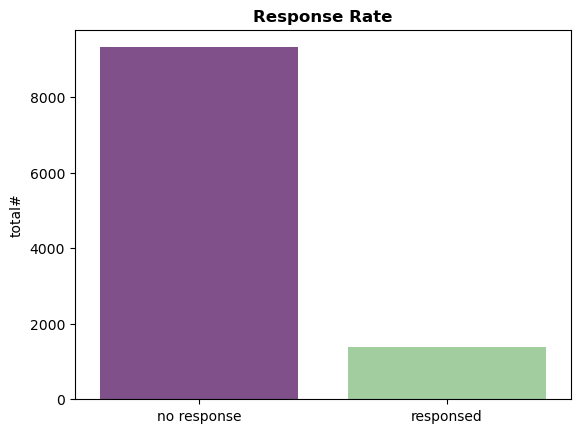

In [52]:
# create figure and axes
sns.barplot(x = response.index, y=response, palette=palette_response) #color=('red','blue'))
# set title
plt.title('Response Rate', fontweight='bold')
plt.xticks(ticks=[0,1],labels=["no response","responsed"])
plt.ylabel("Total Number")

## Response by Sales Channel

In [17]:
df_base[['response','sales_channel']]

,response,sales_channel
0,no,agent
1,no,call center
2,no,call center
3,yes,branch
4,no,branch
...,...,...
10684,no,web
10685,no,branch
10686,no,web
10687,no,branch


In [18]:
response_sales_channel = df_base.groupby(['sales_channel','response'])['region'].count().reset_index()\
.rename(columns={"region":"count"})

In [19]:
response_sales_channel

,sales_channel,response,count
0,agent,no,3340
1,agent,yes,679
2,branch,no,2665
3,branch,yes,310
4,call center,no,1890
5,call center,yes,209
6,web,no,1421
7,web,yes,175


Text(0, 0.5, 'Total Number')

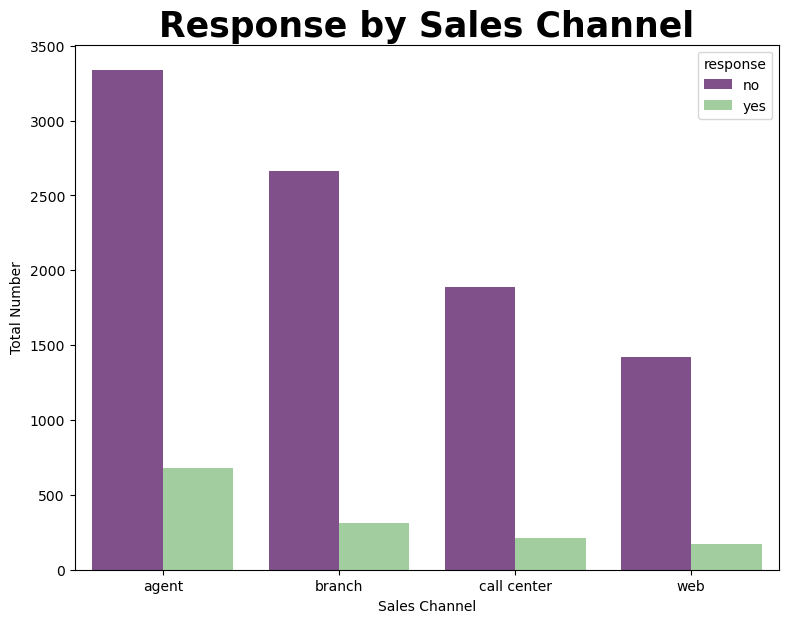

In [21]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Response by Sales Channel', size='25', fontweight='bold')

sns.barplot(x = response_sales_channel['sales_channel'],y = response_sales_channel['count'], hue = response_sales_channel['response'], palette=palette_response)
plt.xlabel('Sales Channel')
plt.ylabel('Total Number')

## Response by Total Claim Amount

In [22]:
min(df_base['total_claim_amount'])

0

In [23]:
max(df_base['total_claim_amount'])

2893

<Axes: >

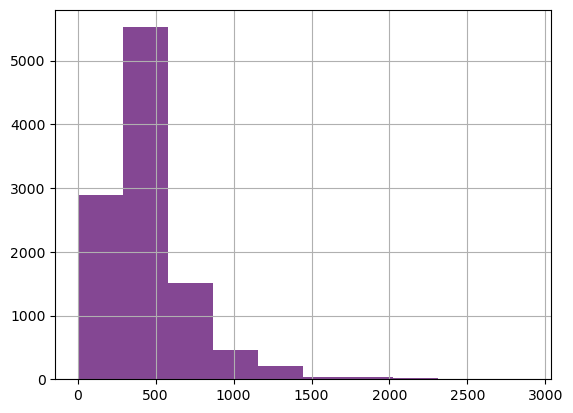

In [24]:
df_base['total_claim_amount'].hist()

In [61]:
df_base['total_claim_amount_categories'] = pd.cut(df_base['total_claim_amount'],bins=[0,500,1000,1500,3000],labels=['0-500','501-1000','1001-1500','1500+'])
#qcut

In [26]:
response_claim_amount = df_base.groupby(['total_claim_amount_categories','response'])['region'].count().reset_index()\
.rename(columns={"region":"count"})

In [27]:
response_claim_amount

,total_claim_amount_categories,response,count
0,0-500,no,6361
1,0-500,yes,882
2,501-1000,no,2534
3,501-1000,yes,428
4,1001-1500,no,331
5,1001-1500,yes,62
6,1500+,no,81
7,1500+,yes,1


Text(0, 0.5, 'Total Number')

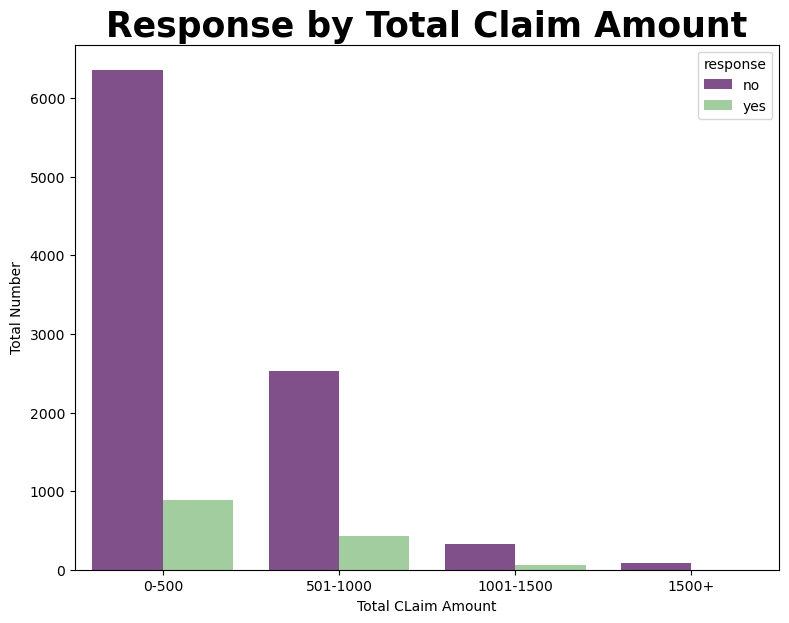

In [28]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Response by Total Claim Amount', size='25', fontweight='bold')

sns.barplot(x = response_claim_amount['total_claim_amount_categories'],y = response_claim_amount['count'], hue = response_claim_amount['response'], palette=palette_response)
plt.xlabel('Total CLaim Amount')
plt.ylabel('Total Number')

## Response by Income

In [29]:
min(df_base['income'])

10037

In [30]:
max(df_base['income'])

99981

<Axes: >

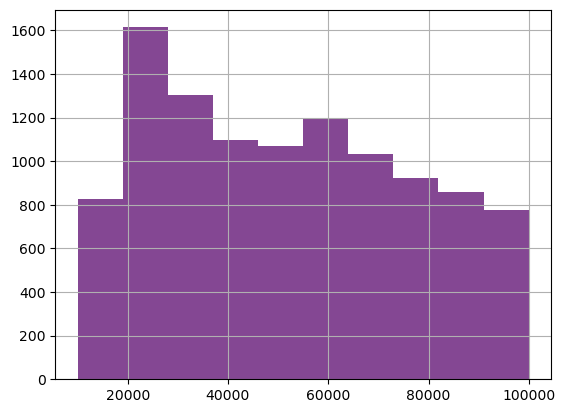

In [31]:
df_base['income'].hist()

In [32]:
df_base['income_categories'] = pd.cut(df_base['income'],bins=[0,20000,40000,60000,80000,100000],\
                           labels=['0-20.000','20.001-40.000','40.001-60.000','60.001-80.000','80.001-100.000'])

In [33]:
response_income = df_base.groupby(['income_categories','response'])['region'].count().reset_index()\
.rename(columns={"region":"count"})

In [34]:
response_income

,income_categories,response,count
0,0-20.000,no,743
1,0-20.000,yes,186
2,20.001-40.000,no,2738
3,20.001-40.000,yes,469
4,40.001-60.000,no,2143
5,40.001-60.000,yes,262
6,60.001-80.000,no,2043
7,60.001-80.000,yes,287
8,80.001-100.000,no,1649
9,80.001-100.000,yes,169


Text(0, 0.5, 'Total Number')

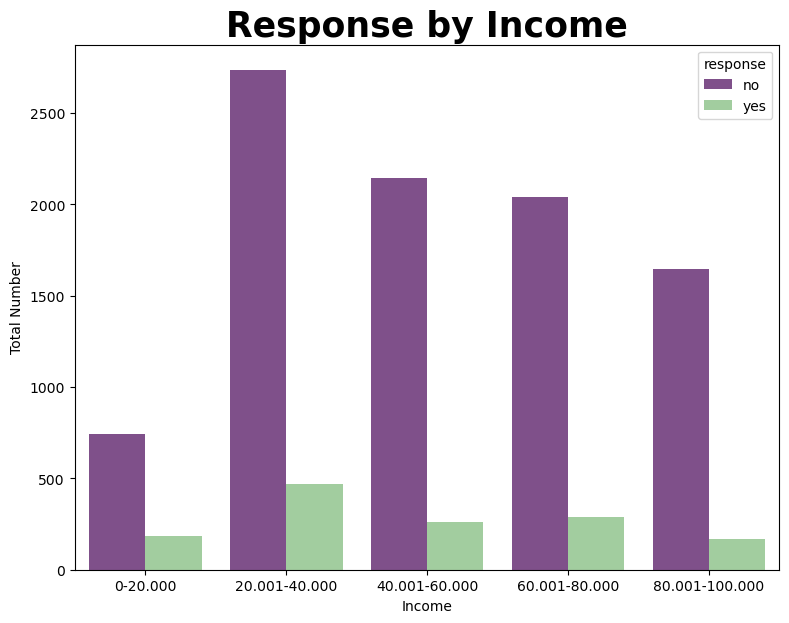

In [35]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Response by Income', size='25', fontweight='bold')

sns.barplot(x = response_income['income_categories'],y = response_income['count'], hue = response_income['response'], palette=palette_response)
plt.xlabel('Income')
plt.ylabel('Total Number')

## Interesting Insights

In [36]:
df_numerical[df_numerical.columns[1:]].corr()['total_claim_amount'][:]

income                          -0.111221
monthly_premium_auto             0.630149
months_since_last_claim          0.013874
months_since_policy_inception    0.004186
number_of_open_complaints       -0.010668
number_of_policies              -0.008019
total_claim_amount               1.000000
Name: total_claim_amount, dtype: float64

<Axes: >

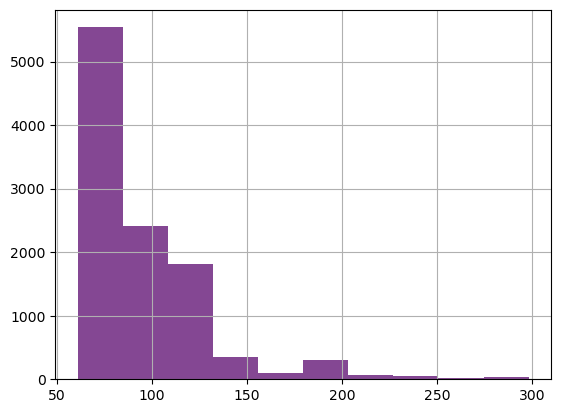

In [37]:
df_base['monthly_premium_auto'].hist()

<Axes: >

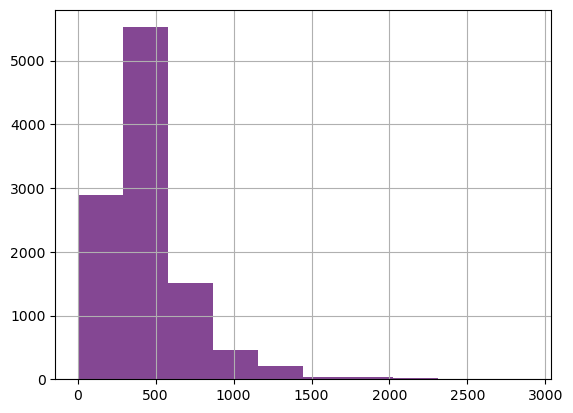

In [38]:
df_base['total_claim_amount'].hist()

In [39]:
df_categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [40]:
df_categorical.drop('effective_to_date', axis=1, inplace=True)

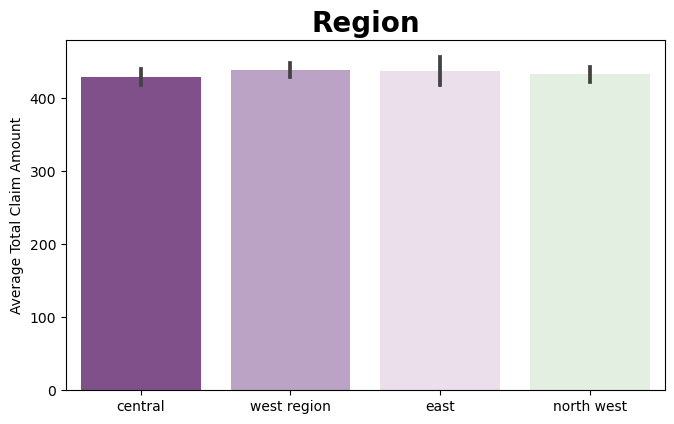

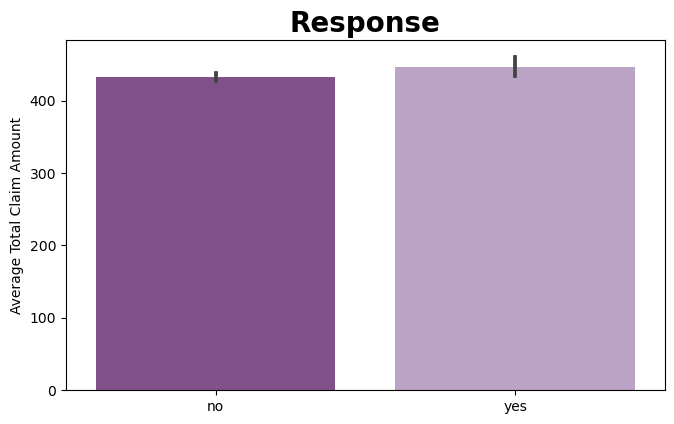

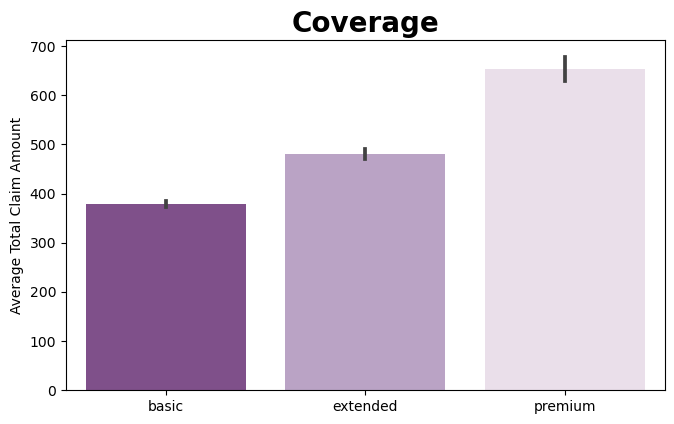

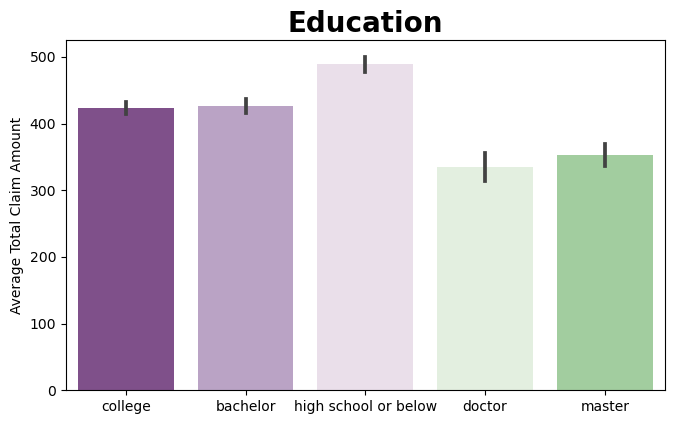

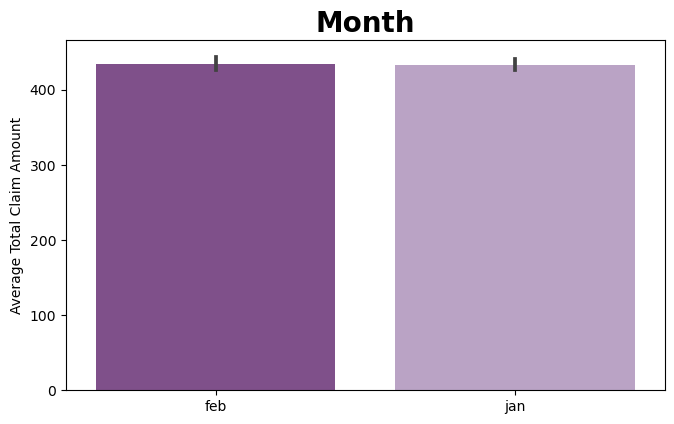

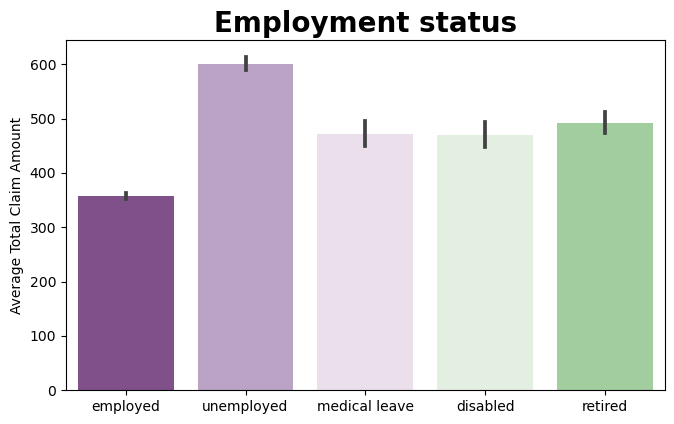

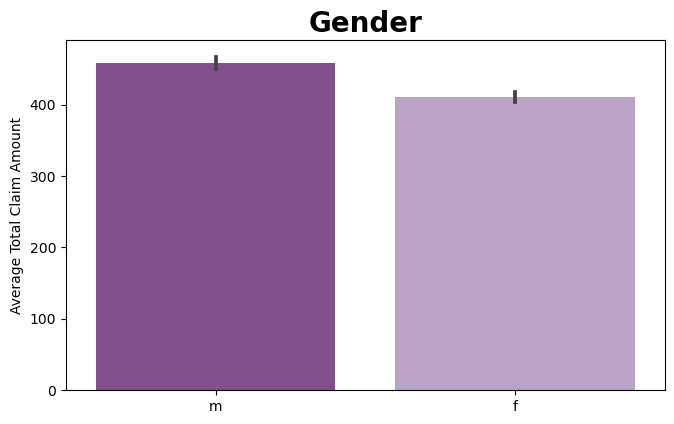

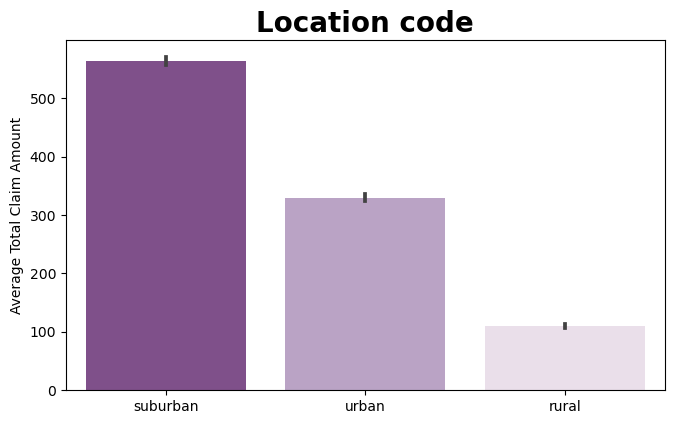

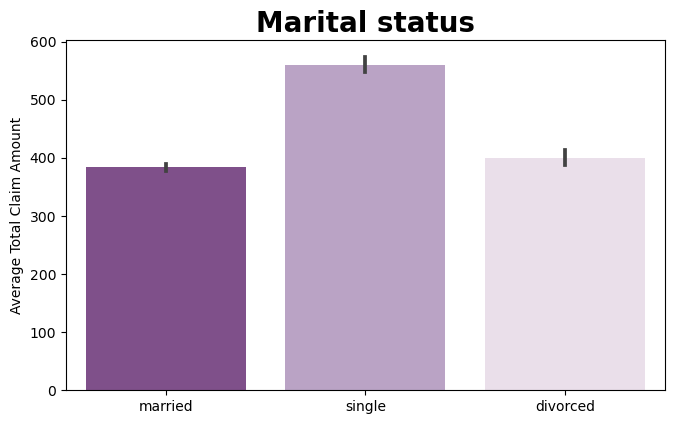

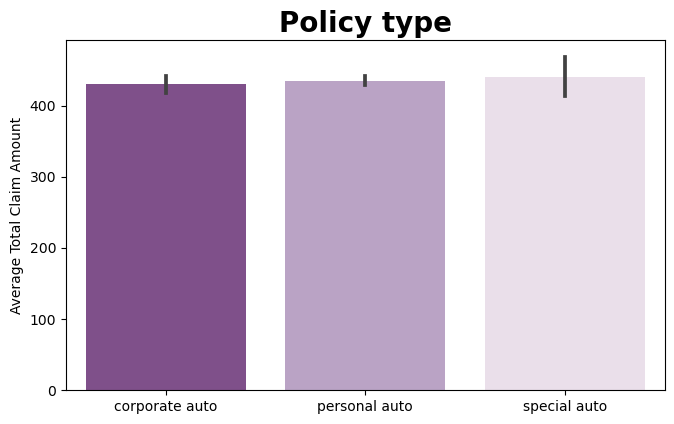

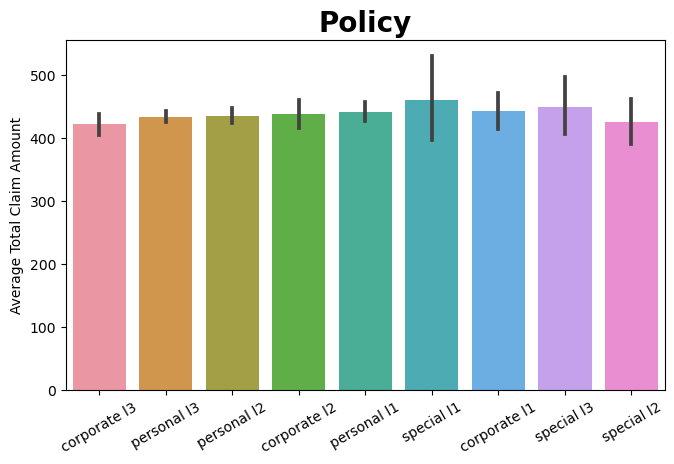

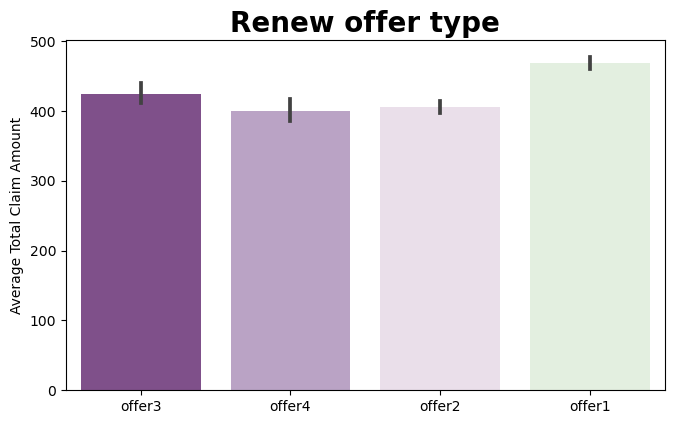

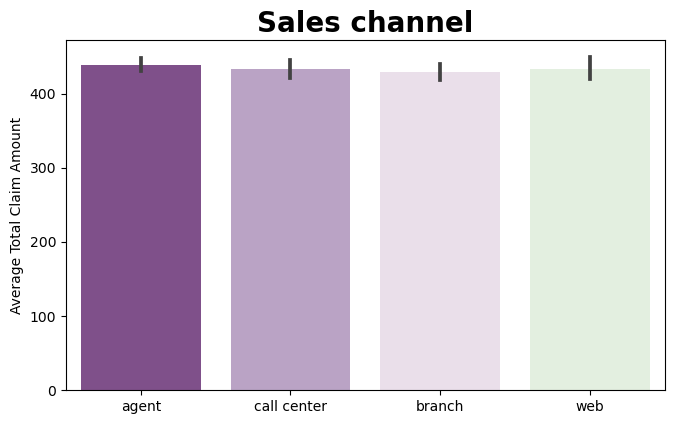

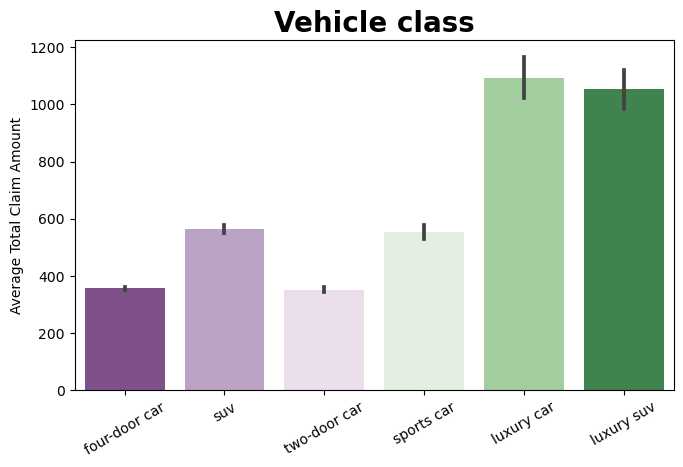

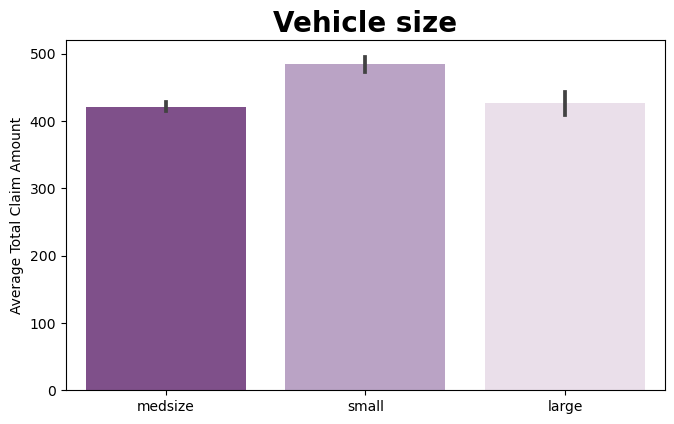

In [41]:
for column in df_categorical.columns: 
    plt.figure(figsize=(17,10))
    plt.subplot(2,2,1)
    plt.title(f'{column.capitalize().replace("_", " ")}', size='20', fontweight='bold')

    sns.barplot(x = df_base[column],y = df_base['total_claim_amount'])
    plt.ylabel('Average Total Claim Amount')
    plt.xlabel('')
    if len(df_base[column].unique()) > 5:
        plt.xticks(rotation=30)

## Looking into Possible Influence from Location on Total Claim Amount

In [42]:
df_base['location_code'].value_counts()

suburban    6742
rural       2086
urban       1861
Name: location_code, dtype: int64

In [63]:
#df_base['total_claim_amount'].loc(df_base['location_code' == 'suburban'])

## Looking into Possible Influence from Employment Status on Total Claim Amount

In [43]:
df_base['employment_status'].value_counts()

employed         6658
unemployed       2751
medical leave     490
disabled          489
retired           301
Name: employment_status, dtype: int64

## Looking into Possible Influence from Education on Total Claim Amount

In [53]:
df_base['education'].value_counts()

bachelor                3210
college                 3141
high school or below    3076
master                   873
doctor                   389
Name: education, dtype: int64